# Import Required Libraries

In [62]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualisations
import seaborn as sns  # For statistical data visualisation based on matplotlib
# Import NumPy library for numerical operations and array handling
import numpy as np

# Import the LabelEncoder class from scikit-learn's preprocessing module
# LabelEncoder transforms categorical labels into numeric values (0 to n_classes-1)
from sklearn.preprocessing import LabelEncoder
# Import StandardScaler from sklearn.preprocessing module
# StandardScaler is used to standardise features by removing the mean and scaling to unit variance
# This is a common preprocessing step for many machine learning algorithms
from sklearn.preprocessing import StandardScaler
# Import KMeans clustering algorithm from scikit-learn library
from sklearn.cluster import KMeans
# Import silhouette_score from sklearn.metrics module
# This function calculates the silhouette coefficient, a measure of how well samples are clustered
# Higher values (closer to 1) indicate well-separated clusters, while values near 0 indicate overlapping clusters
from sklearn.metrics import silhouette_score
import pickle  # Import the pickle module for object serialization and deserialization

# 1. Data Preparation
### 1.1 Load the Dataset

In [63]:
# Load the customer segmentation dataset from a CSV file into a pandas DataFrame
raw_data = pd.read_csv('customer_segmentation_dataset.csv')

In [64]:
# Display the first few rows of the raw_data DataFrame to inspect its structure and content
raw_data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,LoyaltyPoints,PreferredCategory,CustomerID,Gender
0,52.704543,60215.004541,71.054078,5.156217,100.408343,1357.513328,Clothing,1117,Female
1,21.918173,49322.316537,70.683512,3.507173,88.413767,659.809063,Luxury,1369,Male
2,34.672262,25647.414471,34.832829,1.270919,27.656651,61.248931,Groceries,423,Male
3,31.112305,30079.037721,37.244059,1.200491,29.166199,165.077975,Groceries,414,Male
4,36.825627,32691.620112,25.714151,1.448637,24.518336,83.783270,Groceries,452,Female


In [65]:
# Display information about the DataFrame 'raw_data'
# This shows the number of rows, columns, column names, non-null values, and data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1500 non-null   float64
 1   AnnualIncome       1500 non-null   float64
 2   SpendingScore      1500 non-null   float64
 3   PurchaseFrequency  1500 non-null   float64
 4   AverageBasketSize  1500 non-null   float64
 5   LoyaltyPoints      1500 non-null   float64
 6   PreferredCategory  1500 non-null   object 
 7   CustomerID         1500 non-null   int64  
 8   Gender             1500 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 105.6+ KB


In [66]:
# Generate descriptive statistics for the raw_data DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,37.280831,10.261314,10.578378,29.805078,37.500455,44.797507,64.073272
AnnualIncome,1500.0,67264.892504,34264.393922,16576.059764,37344.859024,58596.040847,93588.656419,150788.808085
SpendingScore,1500.0,67.323610,23.568888,20.013068,55.056564,74.839231,84.404828,99.958682
PurchaseFrequency,1500.0,6.379343,4.016314,1.000061,2.998994,5.493192,8.504391,14.997069
AverageBasketSize,1500.0,120.209451,71.351200,2.777223,52.789230,116.193326,169.635239,359.655378
LoyaltyPoints,1500.0,1615.478800,1480.107927,0.298969,499.107283,1000.518510,2249.961077,4995.641711
CustomerID,1500.0,750.500000,433.157015,1.000000,375.750000,750.500000,1125.250000,1500.000000


#### Create a copy of the data for processing and model training
Keeping the raw data for assessment later.

In [67]:
# Create a copy of the raw_data DataFrame to avoid modifying the original data
# This is a good practice when performing data transformations
data = raw_data.copy()

In [68]:
# Display the first 5 rows of the dataframe to get a quick overview of the data structure
data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,LoyaltyPoints,PreferredCategory,CustomerID,Gender
0,52.704543,60215.004541,71.054078,5.156217,100.408343,1357.513328,Clothing,1117,Female
1,21.918173,49322.316537,70.683512,3.507173,88.413767,659.809063,Luxury,1369,Male
2,34.672262,25647.414471,34.832829,1.270919,27.656651,61.248931,Groceries,423,Male
3,31.112305,30079.037721,37.244059,1.200491,29.166199,165.077975,Groceries,414,Male
4,36.825627,32691.620112,25.714151,1.448637,24.518336,83.783270,Groceries,452,Female


### 1.2 Handle Missing Values
Impute missing values using the median for numerical features.

In [69]:
# Check for missing values in the dataset
# This counts the number of null values in each column and returns the sum
data.isnull().sum()

Age                  0
AnnualIncome         0
SpendingScore        0
PurchaseFrequency    0
AverageBasketSize    0
LoyaltyPoints        0
PreferredCategory    0
CustomerID           0
Gender               0
dtype: int64

#### Remove Irrelevant Columns

In [70]:
# Remove CustomerID and LoyaltyPoints columns from the dataframe as they're not needed for analysis
# axis=1 specifies we're dropping columns (not rows)
# inplace=True means the operation modifies the original dataframe instead of returning a copy
data.drop(["CustomerID","LoyaltyPoints"], axis=1, inplace=True)

### 1.3 Encode Categorical Variables
Convert Gender and PreferredCategory into numerical representations.

In [71]:
# Encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['PreferredCategory'] = label_encoder.fit_transform(data['PreferredCategory'])

In [72]:
# Display the first few rows of the transformed dataset to inspect its structure
# This helps verify that any previous transformations were applied correctly
data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,52.704543,60215.004541,71.054078,5.156217,100.408343,0,0
1,21.918173,49322.316537,70.683512,3.507173,88.413767,3,1
2,34.672262,25647.414471,34.832829,1.270919,27.656651,2,1
3,31.112305,30079.037721,37.244059,1.200491,29.166199,2,1
4,36.825627,32691.620112,25.714151,1.448637,24.518336,2,0


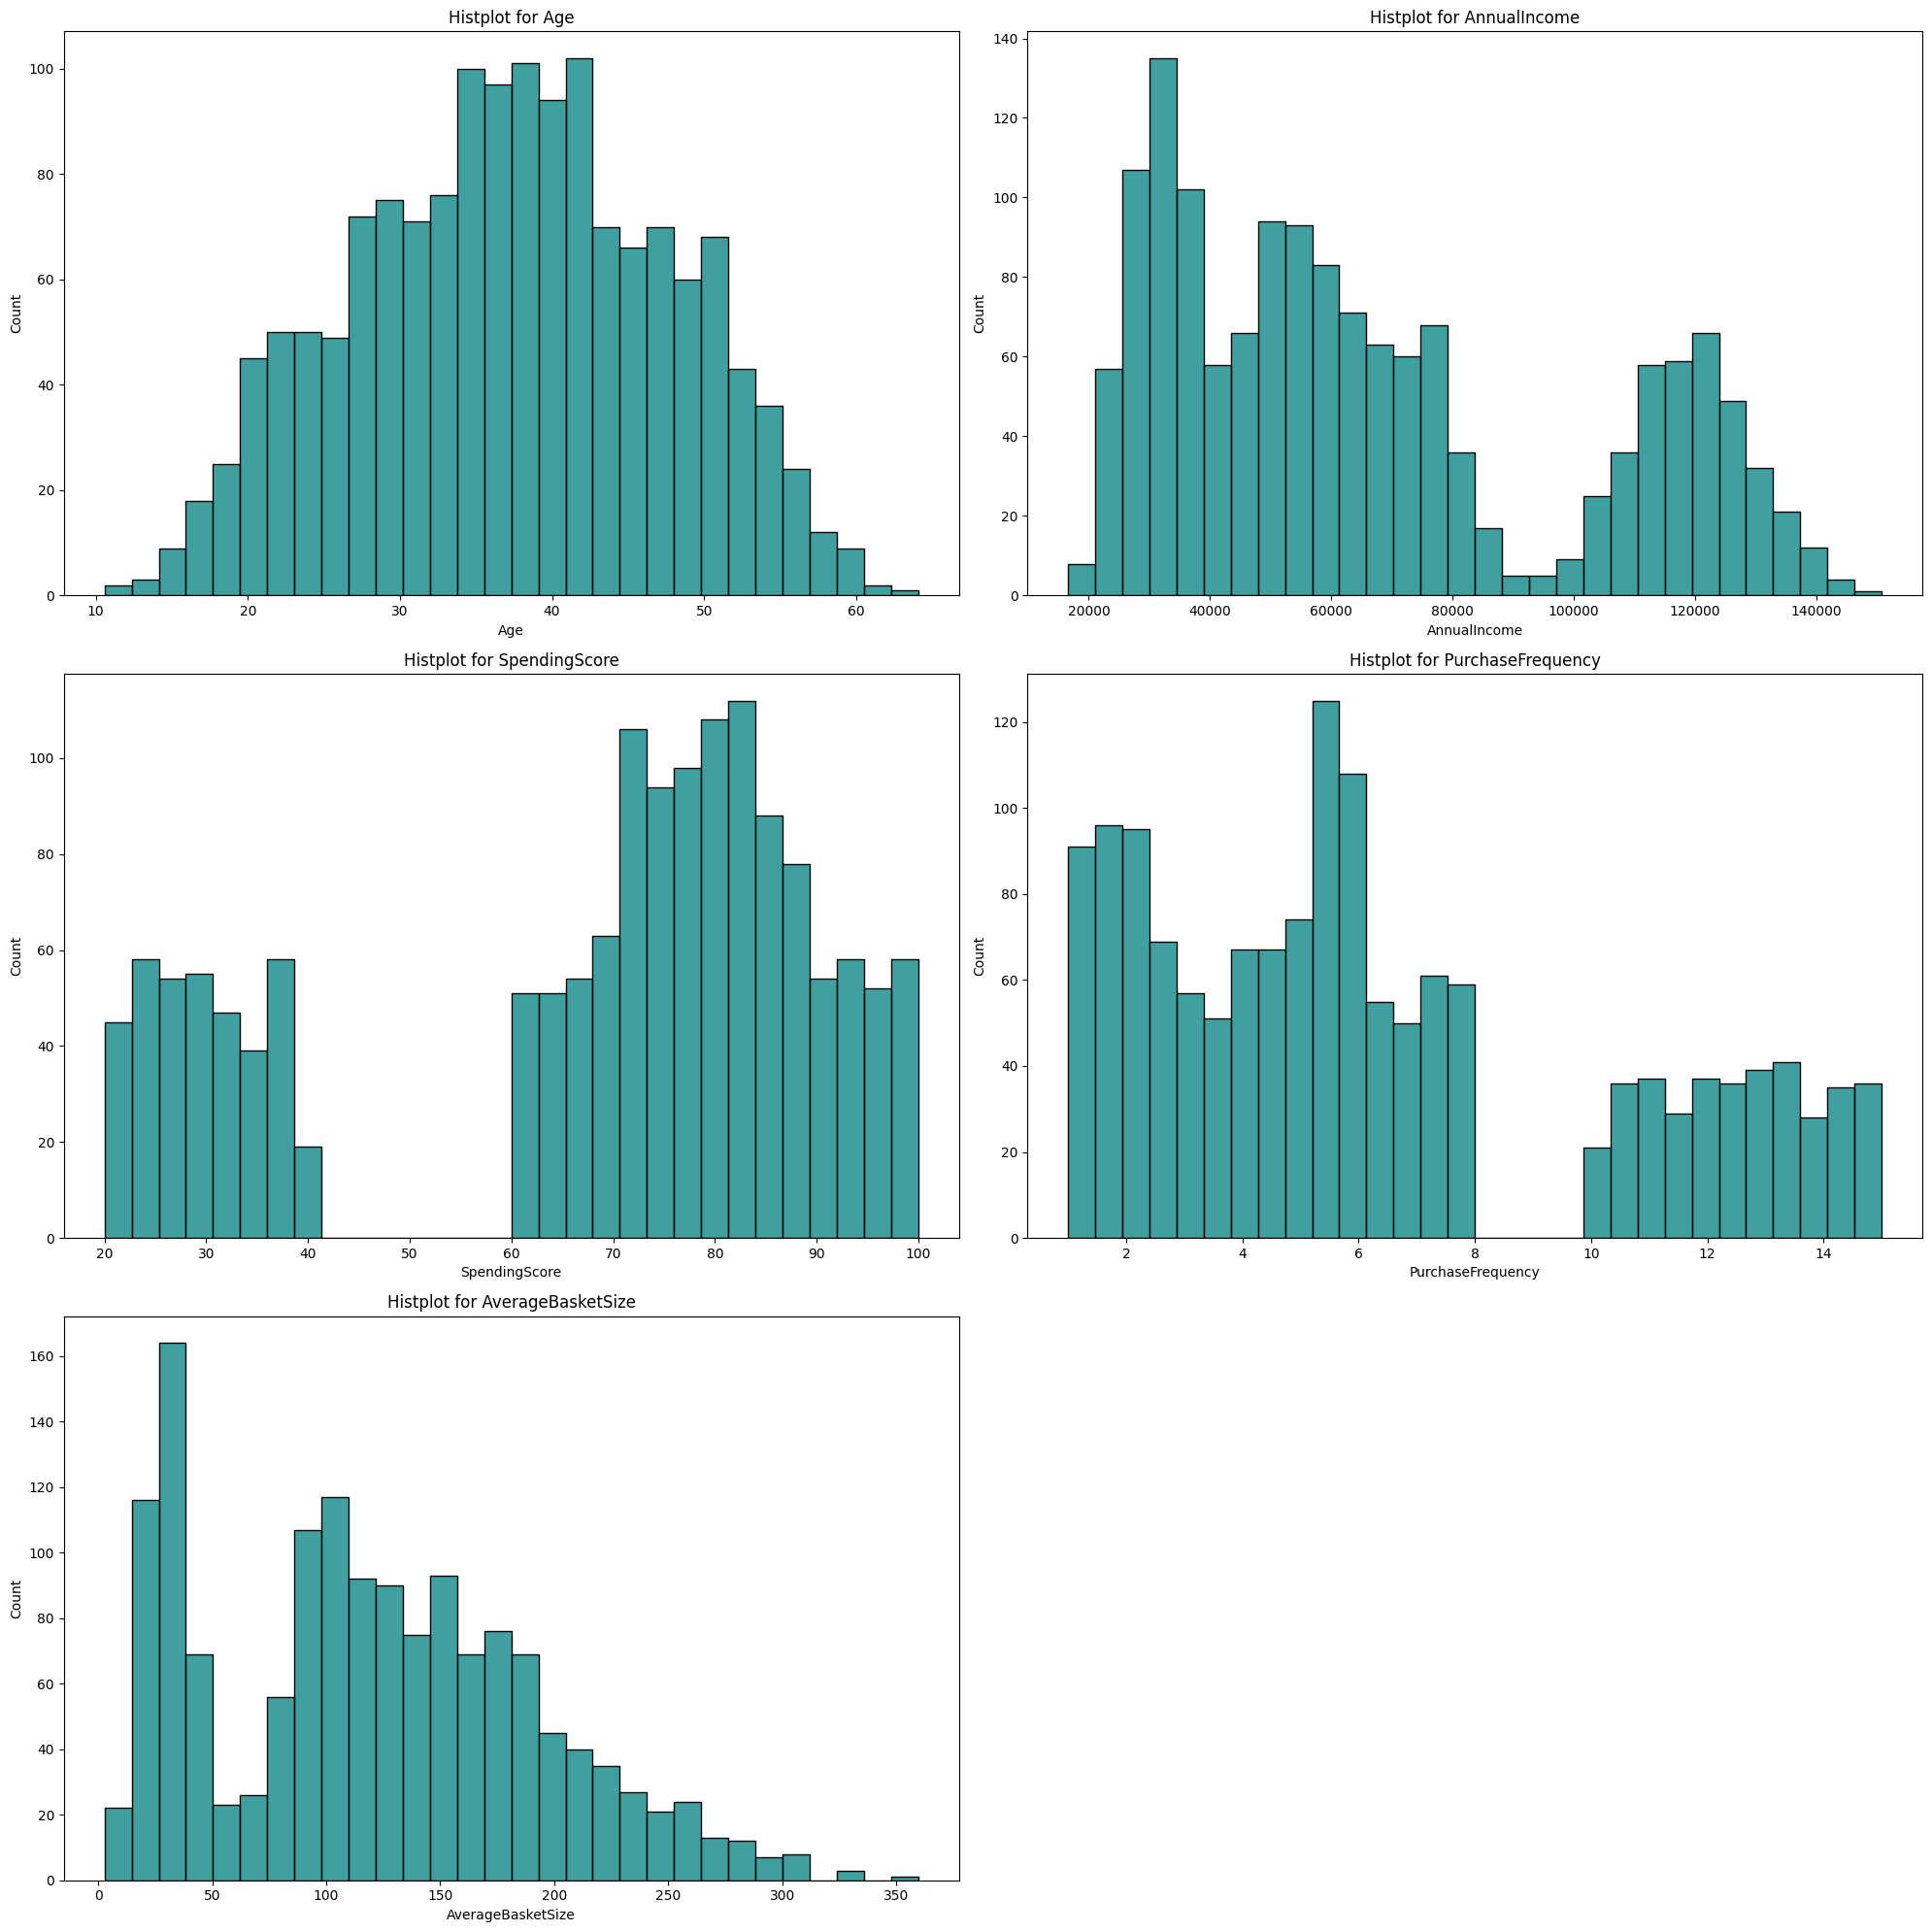

In [73]:
# Define a list of numerical columns to visualize
num_col = ["Age",	"AnnualIncome", "SpendingScore", "PurchaseFrequency", "AverageBasketSize"]

# Create a figure with specified size (20x20 inches)
plt.figure(figsize=(20, 20))

# Loop through each numerical column with enumeration (starting index at 1)
for idx, col in enumerate(num_col, 1):
    # Create a subplot in a 3x2 grid at position idx
    plt.subplot(3,2,idx)
    
    # Create a histogram plot for the current column with 30 bins and teal color
    sns.histplot(data[col], bins=30, color="teal")
    
    # Set the title for the current subplot
    plt.title(f"Histplot for {col}")

# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Display all the plots
plt.show()

### 1.4 Feature Scaling
Scale numerical features for clustering.

In [74]:
# Define a list of numerical features that need to be standardized or normalized
# These features have different scales and units, so scaling will help improve model performance
features_to_scale = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 
                     'AverageBasketSize']

In [75]:
# Apply StandardScaler to normalize numerical features
# This transforms features to have zero mean and unit variance
scaler = StandardScaler()
# Apply the scaling transformation to the selected features in the dataset
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# 2. Clustering
### 2.1 Determine Optimal Number of Clusters
Use the Elbow Method or Silhouette Score to decide the number of clusters.

#### Elbow Method

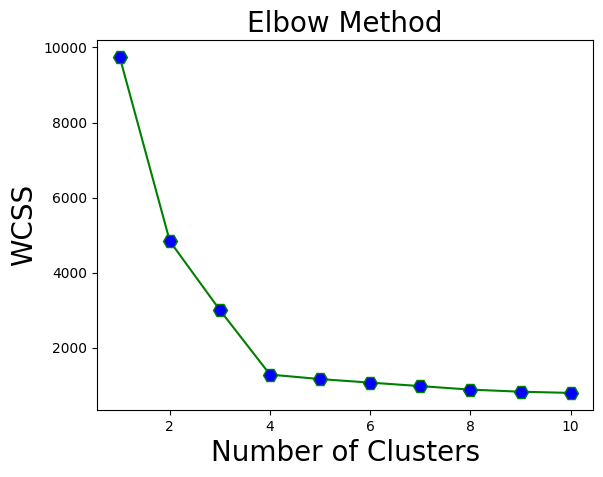

In [76]:
# Calculate Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []
for i in range (1,11):
    # Initialize KMeans with i clusters, using k-means++ initialization method
    # max_iter limits iterations per run, n_init runs algorithm 10 times with different seeds
    kmeans = KMeans (n_clusters= i, init="k-means++",
                    max_iter = 300, n_init= 10)
    # Fit the model to our data
    kmeans.fit(data)
    # Store the inertia (WCSS) value for this cluster configuration
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow Method graph to determine optimal number of clusters
plt.plot(range(1,11),wcss,linestyle ='-', marker = 'H', color = 'g',
         markersize = 10,markerfacecolor = 'b')
plt.title("Elbow Method",fontsize=20)
plt.xlabel("Number of Clusters",fontsize=20)
plt.ylabel("WCSS",fontsize=20)
plt.show()

#### Silhouette Score

In [77]:
# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):  # Test cluster counts from 2 to 10
    # Initialize KMeans with k clusters and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to our data
    kmeans.fit(data)
    # Calculate silhouette score for this clustering and add to our list
    # Higher silhouette scores indicate better-defined clusters
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

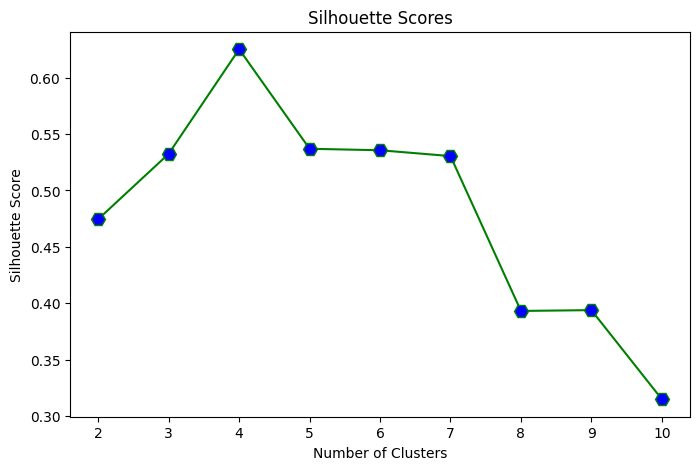

In [78]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))  # Create a new figure with width=8, height=5 inches
plt.plot(range(2, 11), silhouette_scores, linestyle ='-', marker = 'H', color = 'g',
         markersize = 10, markerfacecolor = 'b')  # Plot silhouette scores for k=2 to k=10 with H-shaped markers
plt.title("Silhouette Scores")  # Add title to the plot
plt.xlabel("Number of Clusters")  # Label for x-axis
plt.ylabel("Silhouette Score")  # Label for y-axis
plt.show()  # Display the plot

### 2.2 Apply K-Means Clustering
The optimal number of clusters is 4 (based on the above analysis).

In [79]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 4  # Number of clusters determined from previous analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # Initialize K-Means model with fixed random seed for reproducibility

In [80]:
# Apply K-means clustering to the data
# This fits the model by finding K clusters in the dataset
# The algorithm iteratively assigns data points to clusters and updates centroids
kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

#### We will revert to using the raw data for assessment of the model

In [81]:
# Assign cluster labels from the KMeans model to each data point in the raw_data DataFrame
raw_data['Cluster'] = kmeans.labels_

In [82]:
# Display the first few rows of the raw_data DataFrame to inspect its structure and content
raw_data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,LoyaltyPoints,PreferredCategory,CustomerID,Gender,Cluster
0,52.704543,60215.004541,71.054078,5.156217,100.408343,1357.513328,Clothing,1117,Female,3
1,21.918173,49322.316537,70.683512,3.507173,88.413767,659.809063,Luxury,1369,Male,2
2,34.672262,25647.414471,34.832829,1.270919,27.656651,61.248931,Groceries,423,Male,1
3,31.112305,30079.037721,37.244059,1.200491,29.166199,165.077975,Groceries,414,Male,1
4,36.825627,32691.620112,25.714151,1.448637,24.518336,83.783270,Groceries,452,Female,1


# 3. Model Interpretation
Lets visualize relationships between key variables and the different clusters to interprete the model. Here we will use the `raw data` for visualizing the real properties.

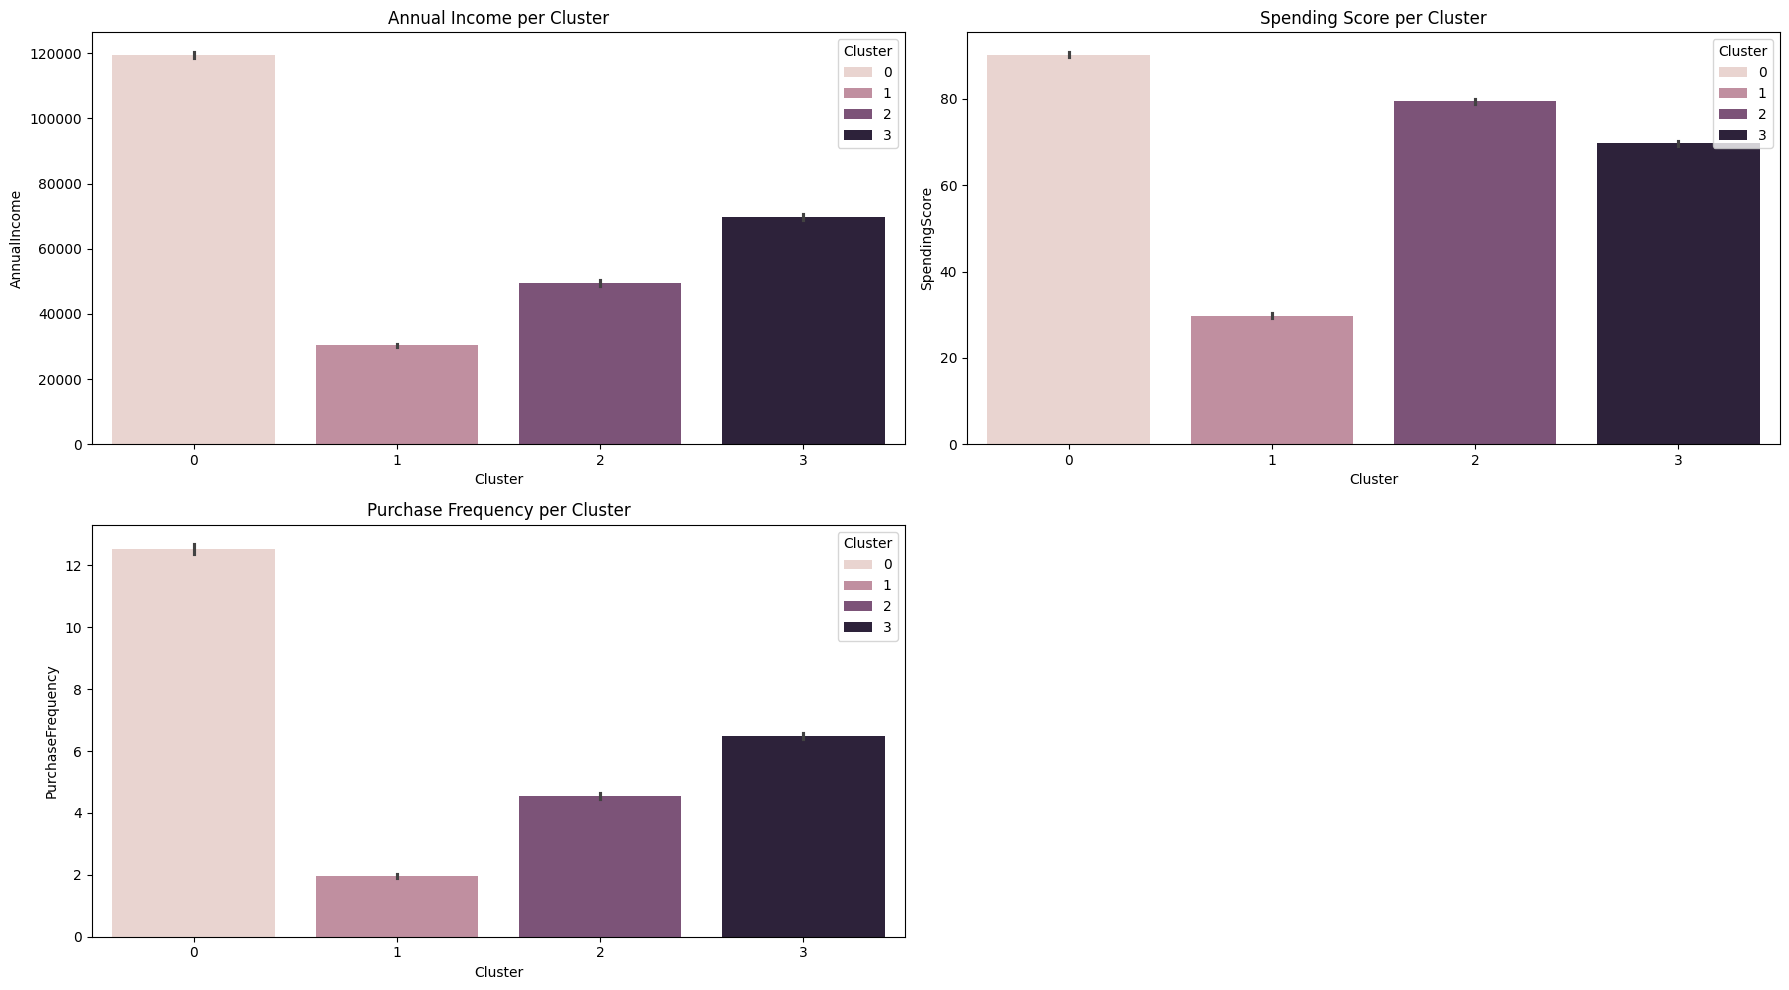

In [83]:
# Create a figure with specified size for multiple subplots
plt.figure(figsize = (18,10))

# First subplot: Bar plot showing average Annual Income for each cluster
plt.subplot(2,2,1)
sns.barplot(x='Cluster', y='AnnualIncome', hue="Cluster", data=raw_data) 
plt.title('Annual Income per Cluster')

# Second subplot: Bar plot showing average Spending Score for each cluster
plt.subplot(2,2,2)
sns.barplot(x='Cluster', y='SpendingScore', hue="Cluster", data=raw_data)
plt.title('Spending Score per Cluster')

# Third subplot: Bar plot showing average Purchase Frequency for each cluster
plt.subplot(2,2,3)
sns.barplot(x='Cluster', y='PurchaseFrequency',hue="Cluster",  data=raw_data)
plt.title('Purchase Frequency per Cluster')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Display all the plots
plt.show()

### Business Insights

**Cluster Profiles:**
- Cluster 0: High-income, high-spending frequent buyers (likely premium customers).
- Cluster 1: Low-income, low-spending infrequent buyers (price-sensitive customers).
- Cluster 2: Young, high-spending occasional buyers (luxury-oriented shoppers).
- Cluster 3: Mid-income, moderate-spending regular buyers (consistent shoppers).

# DEMO: Real-Time Usage of Trained Machine Learning Models

In [84]:
# Load dataset from CSV file
data = pd.read_csv('customer_segmentation_dataset.csv')

# Encode categorical variables using LabelEncoder
# This converts text categories into numerical values that ML algorithms can process
label_encoders = {}  # Dictionary to store encoders for reuse later in prediction

categorical_columns = ['PreferredCategory', 'Gender']
for column_name in categorical_columns:
    le = LabelEncoder()  # Create a new encoder for each categorical column
    data[column_name] = le.fit_transform(data[column_name])  # Transform text to numbers
    label_encoders[column_name] = le  # Save the encoder for later use

# Remove irrelevant features that won't help with clustering
data.drop(columns=['CustomerID', 'LoyaltyPoints'], inplace=True)


# Scale numerical features using StandardScaler
# This standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 'AverageBasketSize']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Train the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # random_state ensures reproducibility
kmeans.fit(data)  # Train the model on the preprocessed data

# Add the cluster labels to the dataset for analysis
data['Cluster'] = kmeans.labels_

# Save the trained model, scaler, and encoders for future use
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoders.pkl', 'wb') as encoders_file:
    pickle.dump(label_encoders, encoders_file)

print("Training completed. Model, scaler, and encoders saved.")

Training completed. Model, scaler, and encoders saved.


## Runtime Code

In [85]:
# Load the saved model, scaler, and encoders

# Load the trained KMeans clustering model from the pickle file
with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans = pickle.load(model_file)

# Load the scaler used during training (e.g., StandardScaler or MinMaxScaler)
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Load the dictionary of label encoders used to transform categorical features
with open('label_encoders.pkl', 'rb') as encoders_file:
    label_encoders = pickle.load(encoders_file)


In [86]:
# Example new customer input
# This dictionary represents a single new customer's data.
# Each key corresponds to a feature used during model training.
new_customer = {
    'Age': 30,                   # Customer's age
    'AnnualIncome': 60000,       # Yearly income in dollars
    'SpendingScore': 75,         # Spending score (e.g., from 1–100)
    'PurchaseFrequency': 4,      # Average number of purchases per month
    'AverageBasketSize': 120,    # Average purchase value
    'PreferredCategory': 'Luxury',  # Categorical feature: preferred shopping category
    'Gender': 'Male'             # Categorical feature: customer's gender
}


In [87]:
# Convert the new customer input into a DataFrame
# Wrapping the dictionary in a list creates a single-row DataFrame,
# which is the expected format for preprocessing and model prediction.
new_customer_df = pd.DataFrame([new_customer])


In [88]:
new_customer_df

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,30,60000,75,4,120,Luxury,Male


In [89]:
# Apply the same LabelEncoder used during training
# These are the categorical features that were label-encoded earlier.
categorical_columns = ['PreferredCategory', 'Gender']

for col in categorical_columns:
    le = label_encoders[col]          # Retrieve the label encoder that was fitted on this column during training
    new_customer_df[col] = le.transform(new_customer_df[col])  
    # Transform the categorical value into its corresponding numerical label


In [90]:
# Display the fully preprocessed DataFrame for the new customer
# This shows the final encoded and scaled feature values that were fed into the model.
new_customer_df

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,30,60000,75,4,120,3,1


In [91]:
# Scale the numerical features using the same scaler
# These are the numeric columns that were scaled during model training.
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 'AverageBasketSize']

# Apply the previously fitted scaler to ensure the new input is transformed
# in the exact same way as the training data.
new_customer_df[numerical_columns] = scaler.transform(new_customer_df[numerical_columns])


In [92]:
# Display the fully preprocessed DataFrame for the new customer
# This shows the final encoded and scaled feature values that were fed into the model.
new_customer_df

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,-0.709778,-0.212095,0.325809,-0.592617,-0.002936,3,1


In [93]:
# Select the features that were used to train the KMeans model
# The order of columns must match the training data to ensure correct predictions.
selected_columns = [
    'Age',
    'AnnualIncome',
    'SpendingScore',
    'PurchaseFrequency',
    'AverageBasketSize',
    'PreferredCategory',
    'Gender'
]


In [94]:
# Ensure the feature columns match the training dataset
X_new = new_customer_df[selected_columns]

In [95]:
# Use the trained KMeans model to predict the cluster for the new customer
new_customer_cluster = kmeans.predict(X_new)

# Display the assigned cluster label
new_customer_cluster


array([2])

In [96]:
# Print the predicted cluster number for the new customer
# new_customer_cluster is an array, so we access the first element with [0]
print(f"The new customer belongs to Cluster {new_customer_cluster[0]}.")


The new customer belongs to Cluster 2.


**Cluster 2:** Young, high-spending occasional buyers (luxury-oriented shoppers).

In [97]:
# Check the minimum and maximum values of the AnnualIncome column
# This is useful for understanding the range of income values in the dataset.
data["AnnualIncome"].min(), data["AnnualIncome"].max()


(-1.4798375709342326, 2.4384429797638703)

In [98]:
# Display the 'AnnualIncome' values from the preprocessed new customer DataFrame (X_new)
# Useful for verifying that the value was correctly scaled or transformed.
X_new["AnnualIncome"]


0   -0.212095
Name: AnnualIncome, dtype: float64

In [99]:
# Check the minimum and maximum values of the SpendingScore column
# This helps verify the range of spending scores within the dataset.
data["SpendingScore"].min(), data["SpendingScore"].max()


(-2.007999723441114, 1.3851292555174688)

In [100]:
# Display the transformed (scaled) 'SpendingScore' value for the new customer
# Useful for verifying that preprocessing was applied correctly.
X_new["SpendingScore"]


0    0.325809
Name: SpendingScore, dtype: float64

In [101]:
# Check the minimum and maximum values of the PurchaseFrequency column
# This helps you understand how frequently customers purchase within the dataset.
data["PurchaseFrequency"].min(), data["PurchaseFrequency"].max()


(-1.3398044904423745, 2.146395978220412)

In [102]:
# Display the transformed (scaled) 'PurchaseFrequency' value for the new customer
# Useful for confirming that the preprocessing step was applied correctly.
X_new["PurchaseFrequency"]


0   -0.592617
Name: PurchaseFrequency, dtype: float64